# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Load data

In [2]:
data = np.loadtxt("ex2data1.txt", delimiter=",")

Assign data

In [3]:
# Number of training set
m = data.shape[0];
# Number of features
n = data.shape[1] - 1;
# X is training set
X = data[:, 0:n].reshape(-1, n)
# y is the expected output
y = data[:, n].reshape(-1, 1)

## Visualizing the data

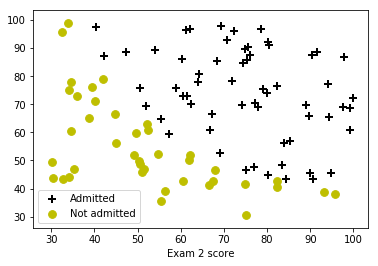

In [4]:
# Find all the position that y is positive and negative correspondly
y_pos = np.where(data[:,2]==1)
y_neg = np.where(data[:,2]==0)

# Plot examples

axes = plt.gca()
axes.scatter(data[y_pos, 0], data[y_pos, 1], marker='+', c='k', s=60, linewidth=2, label="Admitted")
axes.scatter(data[y_neg, 0], data[y_neg, 1], c='y', s=60, label="Not admitted")
axes.set_xlabel("Exam 1 score")
axes.set_xlabel("Exam 2 score")
axes.legend(frameon= True, fancybox = True);
plt.show()

## Implementation

### Warmup exercise: sigmoid function

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### Cost function

In [6]:
def costFunction(theta, X, y):
    # Number of training examples
    m, n = X.shape;
    theta = theta.reshape(n,1)
    z = np.dot(X, theta);
    h = sigmoid(z)
    J = (1/m) * np.sum(-np.multiply(y, np.log(h)) - np.multiply(1-y, np.log(1 - h)));
    return J

In [7]:
def gradient(theta, X, y):
    # Number of training examples
    m, n = X.shape;
    theta = theta.reshape(-1,1)
    z = np.dot(X, theta);
    h = sigmoid(z)
    # h - y
    h_y = h - y;
    grad = (1 / m) * np.dot(X.T, h_y)
    return grad.flatten()

In [8]:
ones = np.ones((X.shape[0], 1))
X = np.concatenate((ones, X), axis=1)
initial_theta = np.zeros(X.shape[1])
J = costFunction(initial_theta, X, y)
print("X.shape \n", X.shape)
print("initial_theta.shape \n", initial_theta.shape)
grad = gradient(initial_theta, X, y)
print('Cost: \n', J)
print('Grad: \n', grad)

X.shape 
 (100, 3)
initial_theta.shape 
 (3,)
Cost: 
 0.69314718056
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


### Optimize cost function 

In [9]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})

C:\Users\bacnx\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\bacnx\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [10]:
res

      fun: 0.20349770158944375
 hess_inv: array([[  3.31474479e+03,  -2.63892205e+01,  -2.70237122e+01],
       [ -2.63892205e+01,   2.23869433e-01,   2.02682332e-01],
       [ -2.70237122e+01,   2.02682332e-01,   2.35335117e-01]])
      jac: array([ -9.52476816e-09,  -9.31921314e-07,  -2.82608927e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

### Bounding decision

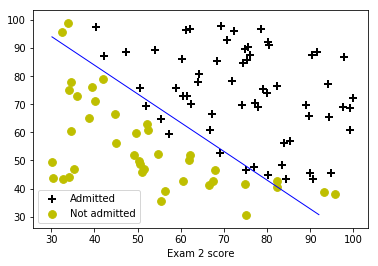

In [11]:
# Find all the position that y is positive and negative correspondly
y_pos = np.where(data[:,2]==1)
y_neg = np.where(data[:,2]==0)

# Plot examples

axes = plt.gca()
axes.scatter(data[y_pos, 0], data[y_pos, 1], marker='+', c='k', s=60, linewidth=2, label="Admitted")
axes.scatter(data[y_neg, 0], data[y_neg, 1], c='y', s=60, label="Not admitted")
axes.set_xlabel("Exam 1 score")
axes.set_xlabel("Exam 2 score")
axes.legend(frameon= True, fancybox = True);

feature1_min, feature2_min = np.min(data[:,0]), np.min(data[:,1])
feature1_max, feature2_max = np.max(data[:,0]), np.max(data[:,1])
feature1_range_plot, feature2_range_plot = np.meshgrid(np.linspace(feature1_min, feature1_max), np.linspace(feature2_min, feature2_max))
feature_set = np.c_[np.ones((feature1_range_plot.ravel().shape[0], 1)), feature1_range_plot.ravel(), feature2_range_plot.ravel()];
predict_set = sigmoid(feature_set.dot(res.x));
predict_set = predict_set.reshape(feature1_range_plot.shape)
plt.contour(feature1_range_plot, feature2_range_plot, predict_set, [0.5], linewidths=1, colors='b')
plt.show()